In [1]:
#import the nesessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load dataset from the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 19s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


In [3]:
# build the Convolutional Neural Network (CNN) model using Keras' Sequential
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Layer 1
    MaxPooling2D(pool_size=(2, 2)),                                  # Layer 2
    Conv2D(64, (3, 3), activation='relu'),                           # Layer 3
    MaxPooling2D(pool_size=(2, 2)),                                  # Layer 4
    Flatten(),                                                       # Layer 5
    Dense(128, activation='relu'),                                   # Layer 6
    Dropout(0.5),
    Dense(10, activation='softmax')                                  # Output layer
])

C:\Users\user\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# compile and train the CNN model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_cat, epochs=5, validation_data=(x_test, y_test_cat))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.7297 - loss: 0.7470 - val_accuracy: 0.8624 - val_loss: 0.3776
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8607 - loss: 0.3893 - val_accuracy: 0.8812 - val_loss: 0.3219
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8779 - loss: 0.3387 - val_accuracy: 0.8946 - val_loss: 0.2949
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 20ms/step - accuracy: 0.8915 - loss: 0.3008 - val_accuracy: 0.8958 - val_loss: 0.2811
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9022 - loss: 0.2745 - val_accuracy: 0.9027 - val_loss: 0.2750


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


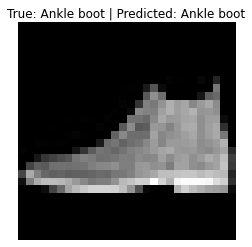

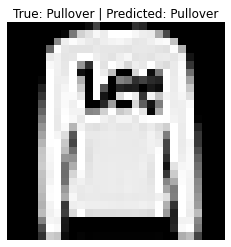

In [6]:
# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select two test images
sample_images = x_test[:2]
sample_labels = y_test[:2]

# Predict
predictions = model.predict(sample_images)

# Display predictions
for i in range(2):
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[sample_labels[i]]} | Predicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()